In [32]:
import numpy as np 
import pandas as pd

import ExcessMortalityFunctions as emf
from importlib import reload
reload(emf)

from scipy.stats import poisson

import matplotlib.pyplot as plt

%matplotlib widget

# import sys
 
# # setting path
# sys.path.append('../Functions')
# import PandemiXSignaturesForSubfolders as ps

# Make some testing data on monthly time resolution

In [132]:
# Generate some data for testing
d1 = np.datetime64('1850-01')
d2 = np.datetime64('1870-01')
ts = np.arange(d1,d2)

# Constant
curMean = 50 
curBase = poisson.rvs(curMean,size = len(ts))
# curBase = curMean * np.ones(len(ts))

# Linearly increasing
curMean2 = 100
allMeans = np.linspace(curMean,curMean2,len(ts))
curBase2 = poisson.rvs(allMeans,size = len(ts))

# Sinusoidal
tDays = (ts -ts[0])/np.timedelta64(1,'M')
sinAmp = 10
sinPer = 2*np.pi/12
# curBase3 = np.round(poisson.rvs(curMean,size = len(ts)) + sinAmp * np.sin(tDays * sinPer))
curBase3 = np.round(poisson.rvs(curMean + sinAmp * np.sin(tDays * sinPer) + sinAmp/2,size = len(ts)))


# Sinusoidal and linear
tDays = (ts -ts[0])/np.timedelta64(1,'M')
sinAmp = 10
sinPer = 2*np.pi/12
curBase4 = np.round(poisson.rvs(allMeans + sinAmp * np.sin(tDays * sinPer) + sinAmp/2,size = len(ts)))


# Constant
# curMean = 1
curMean = 1
# curMean = 40
curBase = poisson.rvs(curMean,size = len(ts))
curBaseConstant = curMean * np.ones(len(ts))

# Linearly increasing
# curMean2 = 4
curMean2 = curMean * 3
allMeans = np.linspace(curMean,curMean2,len(ts))
curBase2 = poisson.rvs(allMeans,size = len(ts))

# Sinusoidal
tDays = (ts -ts[0])/np.timedelta64(1,'M')
# sinAmp = 2
sinAmp = curMean/3
sinPer = 2*np.pi/12
curSin = sinAmp * np.sin(tDays * sinPer) + sinAmp + curMean 
curBase3 = poisson.rvs(curSin,size = len(ts))


# Sinusoidal and linear
tDays = (ts -ts[0])/np.timedelta64(1,'M')
curSinLin = sinAmp * np.sin(tDays * sinPer) + sinAmp + allMeans
curBase4 = poisson.rvs(curSinLin,size = len(ts))



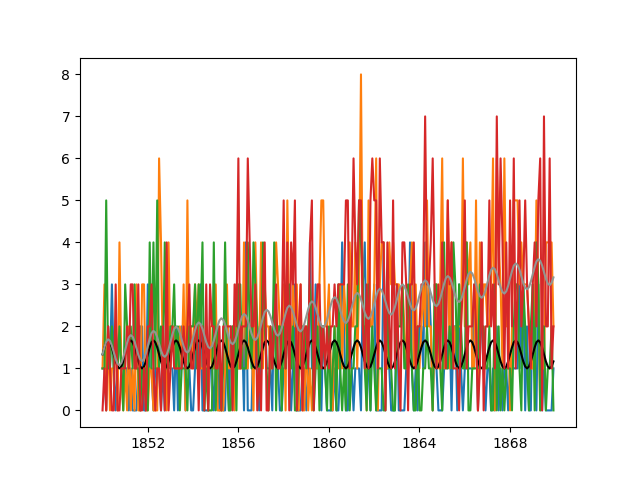

In [133]:

# Plot
fig,ax = plt.subplots()
ax.plot(ts,curBase)
ax.plot(ts,curBase2)
ax.plot(ts,curBase3)
ax.plot(ts,curSin,'k') 
ax.plot(ts,curBase4)
ax.plot(ts,curSinLin,color='xkcd:gray')

In [134]:

df = pd.DataFrame(
    index = ts,
    data={
        'Base':curBase,
        'Base2':curBase2,
        'Base3':curBase3,
        'Base4':curBase4,
        }
)

# df.plot()


In [135]:
def serflingModel(t,pars):
    a,b,c1,c2,f = pars 

    y = a + b * t + c1 * np.sin(t * 2 * np.pi / f) + c2 * np.cos(t * 2 * np.pi / f)

    return y 

# def serflingModel(t,pars):
#     a,b,c,p,f = pars 

#     y = a + b * t + c * np.sin((t+p) * 2 * np.pi / f)

#     return y 




In [160]:
curData = df.Base3.copy().values
# curData[80]=30
# curData[81]=10

In [161]:


def errorFunc(t,modelpars):
    a,b,c1,c2 = modelpars 
    f = 12
    allPars = (a,b,c1,c2,f)

    ys = serflingModel(t,allPars)

    # curErr = df.Base4 - ys
    curErr = curData - ys

    return curErr

modelpars = (5,0.01,1,2)
errorFunc(tDays,modelpars)

def funcToMinimize(t,modelpars):
    return np.sum(np.power(errorFunc(t,modelpars),2))

from scipy.optimize import minimize 

curRes = minimize(lambda ps: funcToMinimize(tDays,ps),modelpars)

curRes

      fun: 341.01532852992557
 hess_inv: array([[ 8.29113498e-03, -5.19480831e-05, -1.93694796e-04,
        -5.20252515e-05],
       [-5.19480831e-05,  4.34711725e-07,  1.62125350e-06,
         4.35198002e-07],
       [-1.93694796e-04,  1.62125350e-06,  4.17274801e-03,
         1.65589843e-06],
       [-5.20252515e-05,  4.35198002e-07,  1.65589843e-06,
         4.16706595e-03]])
      jac: array([-1.90734863e-04,  5.32531738e-03, -3.81469727e-05, -1.06811523e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 227
      nit: 4
     njev: 43
   status: 2
  success: False
        x: array([ 1.62054321e+00, -1.18307070e-03,  2.40520419e-01, -2.55852335e-02])

In [162]:
curModelPars = curRes.x 

a,b,c1,c2 = curModelPars 
f = 12
allPars = (a,b,c1,c2,f)

ys = serflingModel(tDays,allPars)



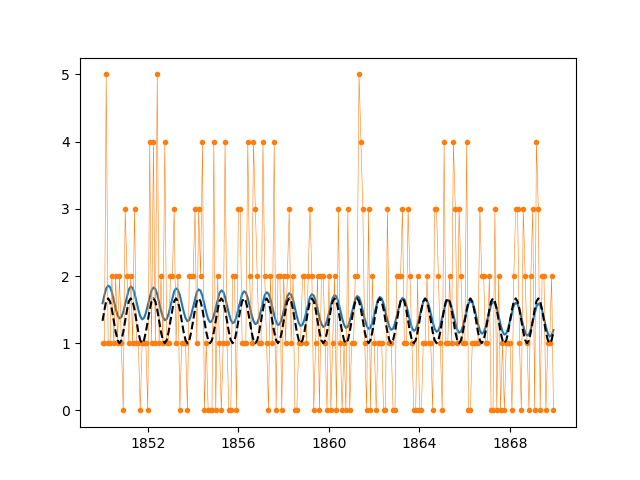

In [163]:
fig,ax = plt.subplots()
ax.plot(ts,ys)
ax.plot(ts,curData,'.-',lw=0.4)
# ax.plot(df.Base3,'.-',lw=0.4)
ax.plot(ts,curSin,'k--')
# ax.plot(df.Base4,'.-',lw=0.4)
# ax.plot(ts,curSinLin,'k--')

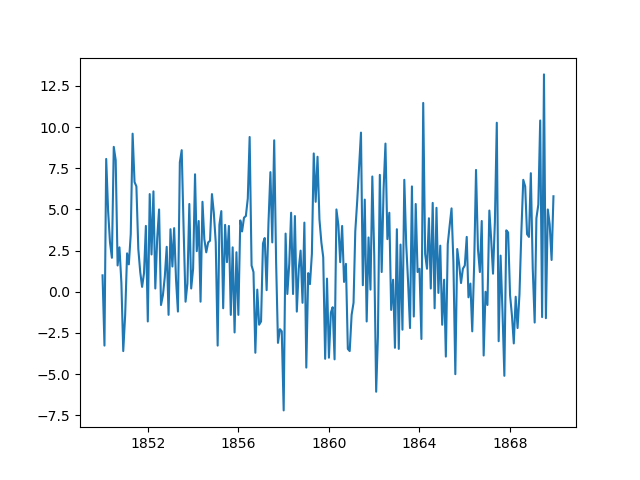

In [85]:

fig,ax = plt.subplots()
f = 12

a = 5
b = 0.02
a = curMean
b = (curMean2 - curMean)/(20*12)
c1 = 1
c2 = 2
pars = (a,b,c1,c2,f)

xs = tDays 
ys = serflingModel(xs,pars)

# ax.plot(ts,ys)

# ax.plot(df.Base4)
# ax.plot(ts,curSinLin)

ax.plot(ts,df.Base4-ys)

# c1 = 1.75
# c2 = 0.25
# pars = (a,b,c1,c2,f)

# xs = tDays 
# ys = serflingModel(xs,pars)

# ax.plot(ts,ys)


# ax.plot(df.Base4)
# ax.plot(ts,curSinLin)

In [79]:

# fig,ax = plt.subplots()
# f = 12

# a = 5
# b = 0.02
# a = curMean
# b = (curMean2 - curMean)/(20*12)
# c1 = 1
# c2 = 1
# pars = (a,b,c1,c2,f)

# xs = tDays 
# ys = serflingModel(xs,pars)

# ax.plot(ts,ys)


# c1 = 1.75
# c2 = 0.25
# pars = (a,b,c1,c2,f)

# xs = tDays 
# ys = serflingModel(xs,pars)

# ax.plot(ts,ys)


# ax.plot(df.Base4)
# ax.plot(ts,curSinLin)